<a href="https://colab.research.google.com/github/SejalJadhav1/python_/blob/main/python_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 13.9 MB/s 
     |████████████████████████████████| 88 kB 8.0 MB/s 
     |████████████████████████████████| 636 kB 54.1 MB/s 
     |████████████████████████████████| 268 kB 66.7 MB/s 
     |████████████████████████████████| 16.9 MB 546 kB/s 
     |████████████████████████████████| 6.8 MB 41.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 43.6 MB/s 
     |████████████████████████████████| 56 kB 3.0 MB/s 
     |████████████████████████████████| 167 kB 48.5 MB/s 
     |████████████████████████████████| 10.4 MB 13.8 MB/s 
     |████████████████████████████████| 2.0 MB 49.6 MB/s 
     |████████████████████████████████| 137 kB 83.5 MB/s 
     |████████████████████████████████| 3.3 MB 47.6 MB/s 
     |████████████████████████████████| 1.7 MB 44.7 MB/s 
  Installing build dependencies ..

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.6 MB/s 


In [ ]:
import pycaret

In [ ]:
from pycaret.datasets import get_data
index = get_data("index")

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [ ]:
data = get_data("juice") # binary classification model 
# purchase is target var

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [ ]:
data.shape

(1070, 19)

In [ ]:
from pycaret.classification import *

clf1 = setup(data, target = 'Purchase', 
             session_id=123, log_experiment=True,
             experiment_name='juice1', normalize = True,
             feature_selection = True) # normalize = True does z score normalization
             # feature_selection calcualtes thec correlation and drops features which are not helpful in predicitions

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
2022/10/04 15:42:24 INFO mlflow.tracking.fluent: Experiment with name 'juice1' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                              

In [ ]:
training_data = get_config(variable = "X_train")
training_data

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X_train)
INFO:logs:Global variable: X_train returned as       SpecialCH_1   PriceMM   PriceCH  ListPriceDiff  Store7_No  PctDiscMM  \
338           0.0  0.728044 -0.068865       0.958222        0.0  -0.590308   
269           0.0  0.728044 -0.068865       0.958222        1.0  -0.590308   
74            0.0 -0.725384 -1.756136       0.770542        0.0  -0.590308   
327           0.0 -0.725384 -0.068865      -0.824738        1.0  -0.095309   
662           1.0  0.345563 -0.068865       0.489022        0.0  -0.590308   
...           ...       ...       ...            ...        ...        ...   
638           0.0  1.110524  1.221400       0.207502        1.0  -0.590308   
113           0.0  0.039577  0.228888      -0.167858        1.0  -0.590308   
96            0.0  0.345563  1.221400      -0.730898        0.0  -0.590308   
106           0.0  0.039577 -0.068865       0.113662        1.0  -0.590308   
1041          0.0 -0

,SpecialCH_1,PriceMM,PriceCH,ListPriceDiff,Store7_No,PctDiscMM,PctDiscCH,SpecialMM_0,LoyalCH,STORE_1,SalePriceCH,WeekofPurchase,STORE_3,PriceDiff,SalePriceMM,StoreID_4
338,0.0,0.728044,-0.068865,0.958222,0.0,-0.590308,-0.440067,1.0,-1.716834,0.0,0.309335,0.064330,0.0,0.642788,0.873313,0.0
269,0.0,0.728044,-0.068865,0.958222,1.0,-0.590308,-0.440067,1.0,-0.102092,0.0,0.309335,0.458207,0.0,0.642788,0.873313,0.0
74,0.0,-0.725384,-1.756136,0.770542,0.0,-0.590308,-0.440067,0.0,0.375354,0.0,-0.908468,-1.576827,0.0,0.569922,0.117757,0.0
327,0.0,-0.725384,-0.068865,-0.824738,1.0,-0.095309,-0.440067,1.0,-0.000752,1.0,0.309335,0.786439,0.0,-0.413767,-0.279905,0.0
662,1.0,0.345563,-0.068865,0.489022,0.0,-0.590308,2.874236,1.0,-0.538793,0.0,-2.341178,0.720793,0.0,1.808641,0.674482,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,0.0,1.110524,1.221400,0.207502,1.0,-0.590308,-0.440067,1.0,-0.212312,0.0,1.240596,-0.395194,1.0,0.351324,1.072143,0.0
113,0.0,0.039577,0.228888,-0.167858,1.0,-0.590308,0.705931,1.0,0.786560,0.0,-0.407020,-0.001316,0.0,0.679221,0.515417,0.0
96,0.0,0.345563,1.221400,-0.730898,0.0,-0.590308,3.746126,0.0,-0.538793,0.0,-2.341178,1.508548,0.0,1.808641,0.674482,0.0
106,0.0,0.039577,-0.068865,0.113662,1.0,-0.590308,1.082721,1.0,0.890019,1.0,-0.908468,-0.592133,0.0,0.934251,0.515417,0.0


In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
data = get_data("juice") # binary classification model 
data.STORE.unique()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


array([1, 0, 2, 3, 4])

In [ ]:
from pycaret.classification import * 
clf1 = setup(data, target = 'Purchase', session_id=123,
             log_experiment=True, experiment_name='juice1',
             ordinal_features = {"STORE":["1","0", "2","3","4"]},
             handle_unknown_categorical=True, 
             unknown_categorical_method = "least_frequent",
             normalize = True, feature_selection = True)

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,True
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('fix_perfect', Remove_100(target='Purchase')),
                ('clean_names', Clean_Colum_N

In [ ]:
training_data = get_config(variable = "X_train")
training_data

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X_train)
INFO:logs:Global variable: X_train returned as       SpecialCH_1   PriceMM   PriceCH  ListPriceDiff  StoreID_2    DiscCH  \
338           0.0  0.728044 -0.068865       0.958222        0.0 -0.442962   
269           0.0  0.728044 -0.068865       0.958222        1.0 -0.442962   
74            0.0 -0.725384 -1.756136       0.770542        0.0 -0.442962   
327           0.0 -0.725384 -0.068865      -0.824738        0.0 -0.442962   
662           1.0  0.345563 -0.068865       0.489022        0.0  2.827085   
...           ...       ...       ...            ...        ...       ...   
638           0.0  1.110524  1.221400       0.207502        0.0 -0.442962   
113           0.0  0.039577  0.228888      -0.167858        1.0  0.705974   
96            0.0  0.345563  1.221400      -0.730898        0.0  3.976020   
106           0.0  0.039577 -0.068865       0.113662        0.0  1.059492   
1041          0.0 -0.725384 -1.

,SpecialCH_1,PriceMM,PriceCH,ListPriceDiff,StoreID_2,DiscCH,StoreID_4,PctDiscMM,LoyalCH,SalePriceCH,WeekofPurchase,StoreID_3,SpecialMM_1,STORE,PriceDiff,SalePriceMM,Store7_Yes
338,0.0,0.728044,-0.068865,0.958222,0.0,-0.442962,0.0,-0.590308,-1.716834,0.309335,0.064330,0.0,0.0,1.0,0.642788,0.873313,1.0
269,0.0,0.728044,-0.068865,0.958222,1.0,-0.442962,0.0,-0.590308,-0.102092,0.309335,0.458207,0.0,0.0,2.0,0.642788,0.873313,0.0
74,0.0,-0.725384,-1.756136,0.770542,0.0,-0.442962,0.0,-0.590308,0.375354,-0.908468,-1.576827,0.0,1.0,1.0,0.569922,0.117757,1.0
327,0.0,-0.725384,-0.068865,-0.824738,0.0,-0.442962,0.0,-0.095309,-0.000752,0.309335,0.786439,0.0,0.0,0.0,-0.413767,-0.279905,0.0
662,1.0,0.345563,-0.068865,0.489022,0.0,2.827085,0.0,-0.590308,-0.538793,-2.341178,0.720793,0.0,0.0,1.0,1.808641,0.674482,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,0.0,1.110524,1.221400,0.207502,0.0,-0.442962,0.0,-0.590308,-0.212312,1.240596,-0.395194,1.0,0.0,3.0,0.351324,1.072143,0.0
113,0.0,0.039577,0.228888,-0.167858,1.0,0.705974,0.0,-0.590308,0.786560,-0.407020,-0.001316,0.0,0.0,2.0,0.679221,0.515417,0.0
96,0.0,0.345563,1.221400,-0.730898,0.0,3.976020,0.0,-0.590308,-0.538793,-2.341178,1.508548,0.0,1.0,1.0,1.808641,0.674482,1.0
106,0.0,0.039577,-0.068865,0.113662,0.0,1.059492,0.0,-0.590308,0.890019,-0.908468,-0.592133,0.0,0.0,0.0,0.934251,0.515417,0.0


In [ ]:
training_data.shape

(748, 17)

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8381,0.8941,0.7591,0.8099,0.7820,0.6537,0.6563,0.400
ridge,Ridge Classifier,0.8355,0.0000,0.7663,0.8015,0.7812,0.6497,0.6526,0.017
lda,Linear Discriminant Analysis,0.8341,0.8947,0.7592,0.8023,0.7784,0.6462,0.6487,0.016
ada,Ada Boost Classifier,0.8221,0.8792,0.7314,0.7940,0.7596,0.6189,0.6220,0.115
gbc,Gradient Boosting Classifier,0.8208,0.8916,0.7522,0.7770,0.7629,0.6191,0.6209,0.137
svm,SVM - Linear Kernel,0.7994,0.0000,0.7277,0.7585,0.7367,0.5755,0.5815,0.016
lightgbm,Light Gradient Boosting Machine,0.7928,0.8750,0.7175,0.7381,0.7262,0.5598,0.5612,0.129
rf,Random Forest Classifier,0.7887,0.8615,0.7137,0.7294,0.7196,0.5504,0.5522,0.510
knn,K Neighbors Classifier,0.7741,0.8296,0.6686,0.7278,0.6935,0.5155,0.5198,0.115
et,Extra Trees Classifier,0.7727,0.8369,0.6996,0.7046,0.6996,0.5172,0.5195,0.467


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
rf = create_model("rf" , fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8200,0.8738,0.7414,0.7818,0.7611,0.6168,0.6174
1,0.8200,0.8977,0.7069,0.8039,0.7523,0.6118,0.6150
2,0.8467,0.9249,0.7719,0.8148,0.7928,0.6712,0.6719
3,0.6711,0.7658,0.6316,0.5625,0.5950,0.3198,0.3213
4,0.7852,0.8614,0.7193,0.7193,0.7193,0.5454,0.5454
Mean,0.7886,0.8647,0.7142,0.7365,0.7241,0.5530,0.5542
Std,0.0619,0.0540,0.0469,0.0931,0.0686,0.1233,0.1232


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8267,0.9085,0.6897,0.8333,0.7547,0.6225,0.6292
1,0.8267,0.9093,0.8966,0.7222,0.8000,0.6502,0.6620
2,0.8667,0.9288,0.8966,0.7879,0.8387,0.7259,0.7303
3,0.8267,0.9055,0.8621,0.7353,0.7937,0.6458,0.6519
4,0.8667,0.9453,0.8966,0.7879,0.8387,0.7259,0.7303
5,0.8667,0.9262,0.9310,0.7714,0.8438,0.7292,0.7391
6,0.7333,0.7909,0.7586,0.6286,0.6875,0.4585,0.4647
7,0.7600,0.8294,0.8571,0.6316,0.7273,0.5216,0.5411
8,0.7973,0.8665,0.7857,0.7097,0.7458,0.5779,0.5800


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_rf


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

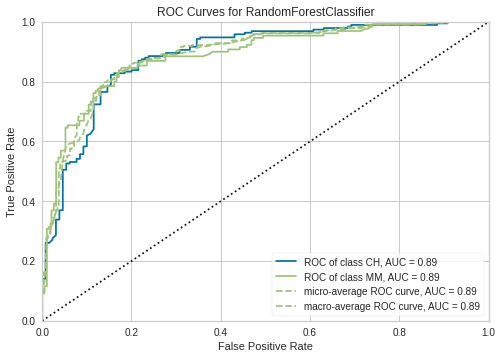

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf)

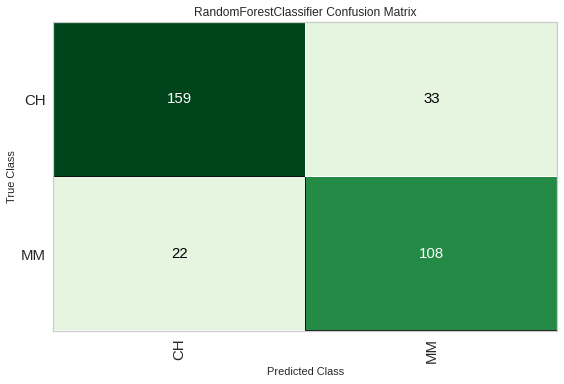

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf , plot = "confusion_matrix")

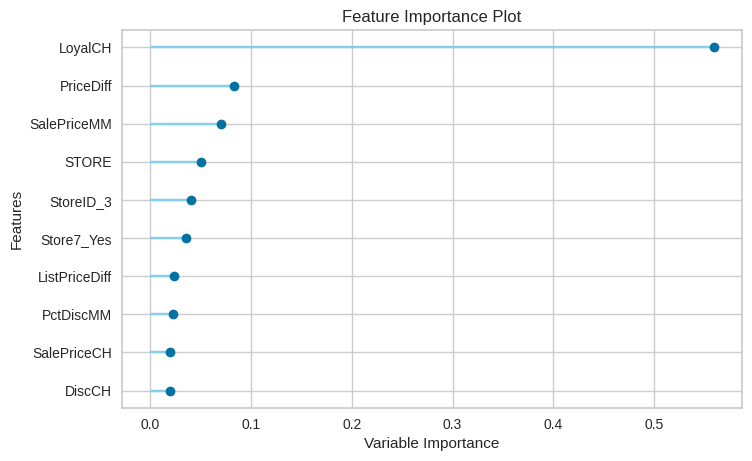

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf , plot = "feature")

In [ ]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
interpret_model(tuned_rf)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
ERROR:logs:shap library not found. pip install shap to use interpret_model function.


ImportError: ignored

In [ ]:
save_model(tuned_rf, model_name='best-model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), model_name=best-model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                           

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Id'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Purchase',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                                         max_features